## A Keras Tutorial on Image Classification With Little Data

Objective: To be able to develop a model for distinguishing cats and dogs

Source: "Building powerful image classification models using very little data" from blog.keras.io.

Step 1: Download data at: https://www.kaggle.com/c/dogs-vs-cats/data

Step 2: Setup overview
- created a data/ folder
- created train/ and validation/ subfolders inside data/
- created cats/ and dogs/ subfolders inside train/ and validation/
- put the cat pictures index 0-999 in data/train/cats
- put the cat pictures index 1000-1400 in data/validation/cats
- put the dogs pictures index 12500-13499 in data/train/dogs
- put the dog pictures index 13500-13900 in data/validation/dogs

Step 3: Organize imports

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Step 4: Set constants and path 

In [2]:
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

Step 5: Manage channel ordering

In [3]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

Step 6: Define the model

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
__________

Step 6: Compile the model

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Step 7: Define Image Data Generator for train and test

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 802 images belonging to 2 classes.


Step 8: Train

In [11]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
125/125 [==============================] - 13s - loss: 0.3901 - acc: 0.8465 - val_loss: 0.5646 - val_acc: 0.6756
Epoch 2/50
125/125 [==============================] - 12s - loss: 0.3951 - acc: 0.8365 - val_loss: 0.5364 - val_acc: 0.7379
Epoch 3/50
125/125 [==============================] - 12s - loss: 0.3866 - acc: 0.8380 - val_loss: 0.6592 - val_acc: 0.7621
Epoch 4/50
125/125 [==============================] - 12s - loss: 0.3760 - acc: 0.8345 - val_loss: 0.5647 - val_acc: 0.7150
Epoch 5/50
125/125 [==============================] - 11s - loss: 0.4309 - acc: 0.8245 - val_loss: 0.5077 - val_acc: 0.7595
Epoch 6/50
125/125 [==============================] - 12s - loss: 0.3827 - acc: 0.8435 - val_loss: 0.5747 - val_acc: 0.7913
Epoch 7/50
125/125 [==============================] - 11s - loss: 0.4313 - acc: 0.8220 - val_loss: 0.8847 - val_acc: 0.7595
Epoch 8/50
125/125 [==============================] - 11s - loss: 0.3869 - acc: 0.8430 - val_loss: 0.4801 - val_acc: 0.7850
Epoch 9/

Step 9: Plot the accuracy from history

dict_keys(['acc', 'loss', 'val_loss', 'val_acc'])


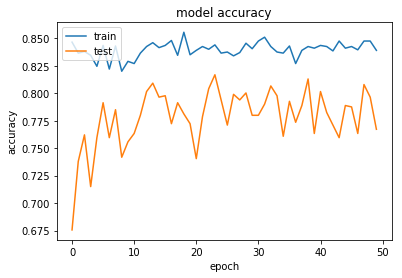

In [12]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Step 10: Sample prediction

In [15]:
from keras.preprocessing import image

test_image = image.load_img('cat.jpg', target_size = (img_width, img_height))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

cat


In [17]:
test_image = image.load_img('dog.jpg', target_size = (img_width, img_height))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog
